# Nuevo Proyecto Machine Learning 

- Este proyecto será un recomendador donde la persona deberá de poner ciertos features para recomendar un restaurante dentro de los que están en la guía Michelin. 





## Extracción de datos

In [126]:
#Para la manipulación de datos
import pandas as pd
import time
import numpy as np

#Servicio y driver de Chrome de Selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

#Las opciones que vamos a tener para buscar elementos
from selenium.webdriver.common.by import By

#Para cuando queramos mandar pulsaciones de teclado
from selenium.webdriver.common.keys import Keys

# Para generar datos artificiales 
import random 

# Para crear el recomendador 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Para el análsis de la muestra 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Para guardar el modelo 
import pickle

In [3]:
# Creamos la conexión con la página web
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
time.sleep(2)

In [4]:
# Ponemos la página web 
url = 'https://guide.michelin.com/es/es'
driver.get(url)


In [5]:
# Encontrar las cookies
elements_by_ID = driver.find_element(By.ID, 'didomi-notice-agree-button')
print(elements_by_ID.text)


Aceptar y cerrar


In [6]:
# Aceptamos las cookies 
acepto = driver.find_element(By.ID, 'didomi-notice-agree-button')
acepto.click()

In [7]:
# Seleccionamos la barra y escribimos Madrid 
# Por ralguna razon el codigo solo me va cuando esta abierta la ventana del chrome a mitad 
# Hay algo en el codigo de la página que hace que el ID pase de ser 'autocomplete-0-input' a 'autocomplete-1-input'

text = driver.find_element(By.ID, 'autocomplete-0-input')

text.click()
time.sleep(2)
text.send_keys('Madrid')
time.sleep(2)
text.send_keys(Keys.ENTER)

In [8]:
# Sacamos el nombre del restaurante 

titulo = driver.find_element(By.CSS_SELECTOR, 'h3')
print(titulo.text)

In [9]:
# Sacamos la ubicacion del restaurante 

ubi = driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/div[2]/div[14]/div/div[2]/div[2]')
print(ubi.text)

Madrid, España


In [10]:
# Sacamos los euroes y el estilo del restaurante 

ubi = driver.find_element(By.XPATH, '/html/body/main/section[1]/div/div/div[2]/div[1]/div/div[2]/div[3]')
print(ubi.text)

€€€€ · Creativa


In [11]:
# Cogemos todos los links que hay en la página
# Hacemos una lista que tenga todos los URLS disponibles de la página para quedarnos con ellos 

urls = []
for i in range(1,9,1):
    link = f'https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/{i}'
    urls.append(link)

In [12]:
# Hacemos el bucle para sacar los 154 datos


lista_nombres = []
lista_ubis = []
lista_estilos = []

for url in urls[:]:
    # Ponemos el servidor donde queremos navegar 

    service = Service(ChromeDriverManager().install())
    driver = webdriver.Chrome(service=service)
    time.sleep(2)
    driver.get(url)
    time.sleep(2)

    # Le damos click al boton de cookies 
    acepto = driver.find_element(By.ID, 'didomi-notice-agree-button')
    acepto.click()

    # Empezamos a crear los dataframes
    nombre = driver.find_elements(By.CSS_SELECTOR, 'h3')
    nombres = []
    for titol in nombre:
        nombres.append(titol.text)

    if url != 'https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/8':
        for i in range(1,21,1):
            ubi = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[2]')
            ubicacion = []
            a = ubi.text
            ubicacion.append(a)
            lista_ubis.append(ubicacion)
    else: 
        for i in range(1,15,1):
            ubi = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[2]')
            ubicacion = []
            a = ubi.text
            ubicacion.append(a)
            lista_ubis.append(ubicacion)


    if url != 'https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/8':
        for i in range(1,21,1):
            estilo = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[3]')
            style = []
            b = estilo.text
            style.append(b)
            lista_estilos.append(style)
    else: 
        for i in range(1,15,1):
            estilo = driver.find_element(By.XPATH, value = f'/html/body/main/section[1]/div/div/div[2]/div{[i]}/div/div[2]/div[3]')
            style = []
            b = estilo.text
            style.append(b)
            lista_estilos.append(style)

    lista_nombres.append(nombres)
    print(url)
    time.sleep(1)


https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/1
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/2
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/3
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/4
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/5
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/6
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/7
https://guide.michelin.com/es/es/comunidad-de-madrid/madrid/restaurantes/page/8


In [13]:
# Creamos un dataframe a mano de los restaurantes que tienen estrella 

estrellas = [2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,
                           0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,2,0,0,0,0,1,0,0,0,0,0,0,
                           0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,
                           1,0,0,1,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

In [14]:
# Hacemos que las listas sean de una sola dimension

lista_names = []
lista_location = []
lista_style = []

for i in lista_nombres:
    for j in i:
        lista_names.append(j)

for i in lista_ubis:
    for j in i:
        lista_location.append(j)

for i in lista_estilos:
    for j in i:
        lista_style.append(j)


lista_names = [r for r in lista_names if r !='']

In [15]:
# Creamos el dataframe 

data = {'Nombres': lista_names,
        'Restaurante': lista_location,
        'Estilo/Precio': lista_style, 
        'Estrellas Michelin': estrellas}

Restaurantes = pd.DataFrame(data)
Restaurantes.head()

,Nombres,Restaurante,Estilo/Precio,Estrellas Michelin
0,Paco Roncero,"Madrid, España",€€€€ · Creativa,2
1,CEBO,"Madrid, España",€€€ · Creativa,0
2,Umiko,"Madrid, España",€€€ · Japonesa,0
3,Casa Mortero,"Madrid, España",€€ · Creativa,0
4,The Omar,"Madrid, España",€€ · Tradicional,0


In [16]:
# Hacemos un split de la columna Estilo/Precio para quedarnos con dos variables del estilo y del precio 
Restaurantes[['Precio', 'Estilo']] = Restaurantes['Estilo/Precio'].str.split('·', n=1, expand=True)
Restaurantes = Restaurantes.drop(columns= 'Estilo/Precio')

In [17]:
Restaurantes

,Nombres,Restaurante,Estrellas Michelin,Precio,Estilo
0,Paco Roncero,"Madrid, España",2,€€€€,Creativa
1,CEBO,"Madrid, España",0,€€€,Creativa
2,Umiko,"Madrid, España",0,€€€,Japonesa
3,Casa Mortero,"Madrid, España",0,€€,Creativa
4,The Omar,"Madrid, España",0,€€,Tradicional
...,...,...,...,...,...
149,99 sushi bar,"Alcobendas, España",0,€€€,Japonesa
150,Casa de Pías,"Getafe, España",0,€€,Moderna
151,La Rotonda,"Rivas-Vaciamadrid, España",0,€€,Tradicional
152,El Viejo Fogón,"Majadahonda, España",0,€€,Tradicional


In [33]:
Restaurantes.groupby('Estilo').nunique().info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries,  A la Parrilla to  Yakitori
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Nombres             35 non-null     int64
 1   Restaurante         35 non-null     int64
 2   Estrellas Michelin  35 non-null     int64
 3   Precio              35 non-null     int64
dtypes: int64(4)
memory usage: 1.4+ KB


## Creación del Recomendador 

- Primero crearemos unos datos artificiales para entrenar el modelo 
- Haremos un modelo de recomendación basado en la opinion previa de usuarios
- Después lo entrenaremos 
- Finalemnte tendremos el producto final 

### Matrix


In [18]:
# Creamos aleatorias para hacer los datos artificiales donde se entrenara el modelo 

nombres = ['Usuario1', 'Usuario2', 'Usuario3', 'Usuario4']
personas = []
resta = []
numeros = [1,2,3,4,5]
valoracion = []
ocasion =  ['Cumpleaños', 'Casual', 'Aniversario', 'Cita romántica']
oc = []
sitios= []

for i in range(700):
    personas.append(random.randint(2,6))

for item in lista_names:
    resta.append(item)
while len(resta) < 700:
    resta.append(random.choice(lista_names))

for i in range(700):
    valoracion.append(random.choice(numeros))

for i in range(700):
    oc.append(random.choice(ocasion))

for i  in range(700):
     sitios.append(random.choice(nombres))

In [19]:
# Unismo todos los datos para crear el DataFrame

fake_data = {'Usuario': sitios,
        'Personas': personas,
        'Restaurante': resta,
        'Valoración': valoracion,
        'Ocasion': oc}
fake_data = pd.DataFrame(fake_data)
fake_data

,Usuario,Personas,Restaurante,Valoración,Ocasion
0,Usuario4,3,Paco Roncero,4,Cita romántica
1,Usuario3,4,CEBO,2,Aniversario
2,Usuario4,5,Umiko,2,Casual
3,Usuario2,5,Casa Mortero,2,Casual
4,Usuario4,2,The Omar,4,Aniversario
...,...,...,...,...,...
695,Usuario4,4,Palm Court,1,Cita romántica
696,Usuario4,3,La Bien Aparecida,4,Cita romántica
697,Usuario1,6,Kabutokaji,3,Cumpleaños
698,Usuario2,3,La Bien Aparecida,2,Cumpleaños


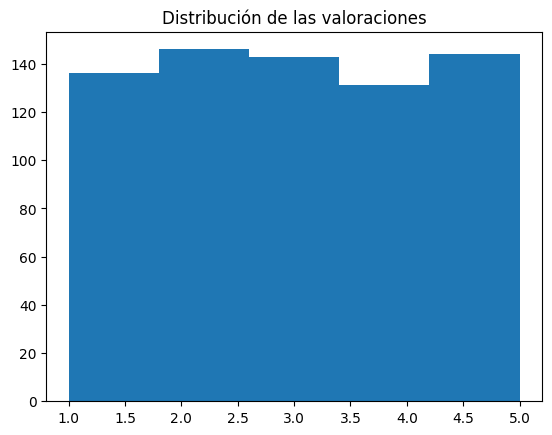

In [20]:
# Hacemos un histograma para ver los ratings generados 

plt.hist(fake_data.Valoración, bins=5)
plt.title('Distribución de las valoraciones')
plt.show()

In [21]:
# Creamos matriz donde cruzamos los Usuarios con los Restaurantes 

matriz = pd.pivot_table(fake_data, values='Valoración', index='Usuario', columns= Restaurantes['Nombres'] ).fillna(0)
matriz

Nombres,99 sushi bar,A'Barra,A'Kangas by Urrechu,A'Nómalo,Alabaster,Alcotán,Amparito Roca,Amós,Arallo Taberna,Arce,...,Urrechu,Vinoteca Moratín,Xeito! 19' 20'',Yugo,Zalacaín,Zuara Sushi,Zurito,enklima,Ático,Èter
Usuario,,,,,,,,,,,,,,,,,,,,,
Usuario1,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,...,0.0,1.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,0.0
Usuario2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0
Usuario3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Usuario4,2.0,4.0,1.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,...,0.0,0.0,3.0,0.0,5.0,0.0,0.0,1.0,5.0,0.0


In [22]:
# Con esta fórmula vemos cuanto valores en 0 hay en el dataset 
ratings = matriz.values
sparsity = float(len(ratings.nonzero()[0]))
sparsity /= (ratings.shape[0] * ratings.shape[1])
sparsity *= 100
print('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 25.16%


In [23]:
# Dividimos en train/test 

ratings_train, ratings_test = train_test_split(ratings, test_size=0.25, random_state=42)
print(ratings_train.shape)
print(ratings_test.shape)

(3, 153)
(1, 153)


In [24]:
# Hacemos una matriz de similitud por las distancias de coseno 

sim_matrix = 1- sklearn.metrics.pairwise.cosine_distances(ratings)
print(sim_matrix.shape)

(4, 4)


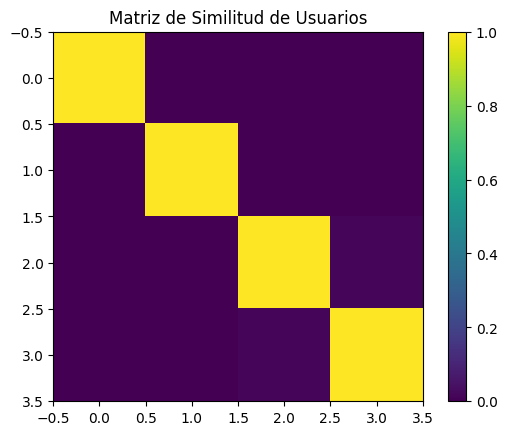

In [25]:
# Hacemos un plot de la matriz de similitud 

plt.imshow(sim_matrix)
plt.colorbar()
plt.title('Matriz de Similitud de Usuarios')
plt.show()

In [26]:
# Separamos 

sim_matrix_train = sim_matrix[0:3, 0:3]
sim_matrix_test = sim_matrix[3:,3: ]
users_predictions = sim_matrix_train.dot(ratings_train) / np.array([np.abs(sim_matrix_train).sum(axis=1)]).T


In [27]:
users_predictions.shape

(3, 153)

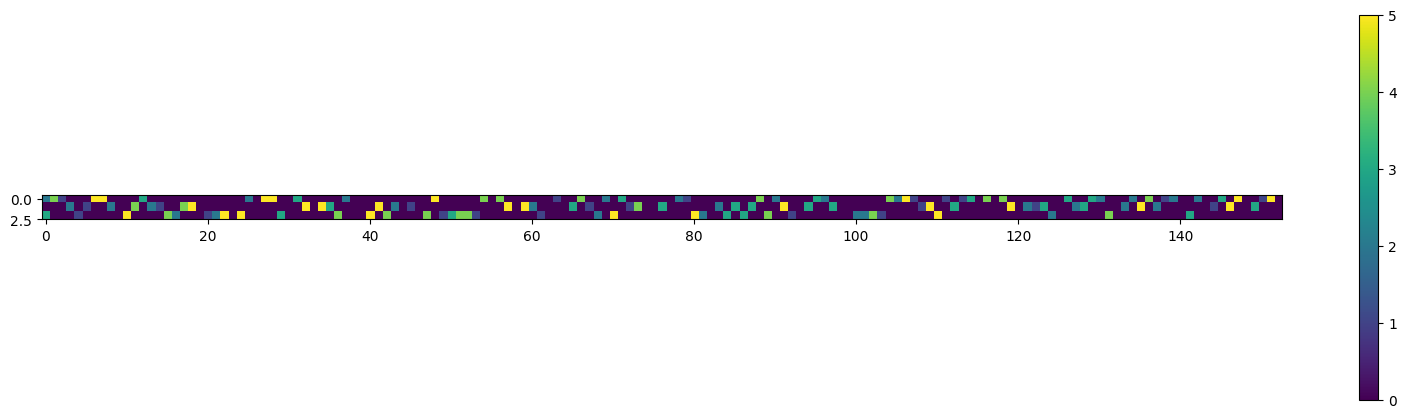

In [28]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
plt.imshow(users_predictions);
plt.colorbar()
plt.show()

### Otro Intento 


In [63]:
# Hacemos un df que sea identico al originl para crear los nuevos features 

res = Restaurantes
ohe = OneHotEncoder()

In [64]:
# Hacemos el one-hot Encoder para nuestro dataset 

featura_array = ohe.fit_transform(res[['Estilo', 'Precio']]).toarray()

In [68]:
#  Guardamos los labels en una variable 
feature_labels = ohe.categories_

In [69]:
np.array(feature_labels, dtype= 'object').ravel()

array([array([' A la Parrilla', ' Actual', ' Andaluza', ' Argentina',
              ' Asturiana', ' Carnes a la parrilla', ' Castellana', ' China',
              ' Clásica', ' Cocina de mercado', ' Cocina de temporada',
              ' Cocina mediterránea', ' Colombiana', ' Creativa', ' Española',
              ' Francesa', ' Francesa moderna', ' Fusión', ' Gallega', ' Hindú',
              ' Innovadora', ' Internacional', ' Italiana', ' Japonesa',
              ' Japonesa contemporánea', ' Mexicana', ' Moderna', ' Peruana',
              ' Pescados y mariscos', ' Regional', ' Steakhouse japonesa',
              ' Tradicional', ' Vasca', ' Vegetariana', ' Yakitori'],
             dtype=object)                                                      ,
       array(['€ ', '€€ ', '€€€ ', '€€€€ '], dtype=object)], dtype=object)

In [70]:
feature_label = np.array(feature_labels, dtype='object').ravel()

In [73]:
labels = []
for i in feature_label:
    for j in i:
        labels.append(j)

In [74]:
print(labels)

[' A la Parrilla', ' Actual', ' Andaluza', ' Argentina', ' Asturiana', ' Carnes a la parrilla', ' Castellana', ' China', ' Clásica', ' Cocina de mercado', ' Cocina de temporada', ' Cocina mediterránea', ' Colombiana', ' Creativa', ' Española', ' Francesa', ' Francesa moderna', ' Fusión', ' Gallega', ' Hindú', ' Innovadora', ' Internacional', ' Italiana', ' Japonesa', ' Japonesa contemporánea', ' Mexicana', ' Moderna', ' Peruana', ' Pescados y mariscos', ' Regional', ' Steakhouse japonesa', ' Tradicional', ' Vasca', ' Vegetariana', ' Yakitori', '€ ', '€€ ', '€€€ ', '€€€€ ']


In [76]:
features = pd.DataFrame(featura_array, columns= labels)
features

,A la Parrilla,Actual,Andaluza,Argentina,Asturiana,Carnes a la parrilla,Castellana,China,Clásica,Cocina de mercado,...,Regional,Steakhouse japonesa,Tradicional,Vasca,Vegetariana,Yakitori,€,€€,€€€,€€€€
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
res = pd.concat([res, features ], axis = 1)
res

,Nombres,Restaurante,Estrellas Michelin,Precio,Estilo,A la Parrilla,Actual,Andaluza,Argentina,Asturiana,...,Regional,Steakhouse japonesa,Tradicional,Vasca,Vegetariana,Yakitori,€,€€,€€€,€€€€
0,Paco Roncero,"Madrid, España",2,€€€€,Creativa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,CEBO,"Madrid, España",0,€€€,Creativa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Umiko,"Madrid, España",0,€€€,Japonesa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Casa Mortero,"Madrid, España",0,€€,Creativa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,The Omar,"Madrid, España",0,€€,Tradicional,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,99 sushi bar,"Alcobendas, España",0,€€€,Japonesa,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
150,Casa de Pías,"Getafe, España",0,€€,Moderna,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
151,La Rotonda,"Rivas-Vaciamadrid, España",0,€€,Tradicional,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
152,El Viejo Fogón,"Majadahonda, España",0,€€,Tradicional,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [79]:
# Aquí tenemos dos opciones, haremos un nearest neighbor para ver como sale y luego probaremos con un KNN para ver que sale mejor 

n_neighbors = 5 

nneighbors = NearestNeighbors(n_neighbors= n_neighbors, metric = 'cosine').fit(features)

In [104]:
Restaurantes.iloc[68]

Nombres               Ramón Freixa Madrid
Restaurante                Madrid, España
Estrellas Michelin                      2
Precio                              €€€€ 
Estilo                           Creativa
Name: 68, dtype: object

In [124]:
dif, ind = nneighbors.kneighbors(features.iloc[[153]])

print('Liked Restaurant')
print ( '='*60)
print(Restaurantes.loc[ind[0][0], :])

print('Recommended Restaurants')
print ( '='*60)
print(Restaurantes.loc[ind[0][:3], :])

Liked Restaurant
Nombres                     Triciclo
Restaurante           Madrid, España
Estrellas Michelin                 0
Precio                           €€ 
Estilo                      Creativa
Name: 11, dtype: object
Recommended Restaurants
          Nombres     Restaurante  Estrellas Michelin Precio     Estilo
11       Triciclo  Madrid, España                   0    €€    Creativa
3    Casa Mortero  Madrid, España                   0    €€    Creativa
125        Ovillo  Madrid, España                   0    €€    Creativa


In [129]:
# Guardamos el modelo 

filename = 'Modelo_Restaurantes'
pickle.dump(nneighbors, open(filename, 'wb'))